In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from cvxopt import matrix, solvers
from sklearn.svm import SVC
import numpy as np

parameters = {}
KERNEL_LINEAR = 1
KERNEL_RBF = 2

DATASET_LINEARLY_SEPARABLE = 1
DATASET_CIRCULAR = 2

In [2]:
dest_folder = './fashion_mnist/'
train_filename = 'train.csv'
test_filename = 'test.csv'
val_filename = 'val.csv'

train_size = 22500
test_size = 5000
val_size = 2501
image_size = 28
label = 784

# Training Data Loading...

In [3]:
# TRAINING DATA LOADING....

f = open(dest_folder+train_filename)
# i=0
# for x in f:
#     lst = x.split(',')
# #     print(int(lst[len(lst)-1][0])==5)
#     if(int(lst[len(lst)-1][0])!=1 and int(lst[len(lst)-1][0])!=2):
#         continue
#     i += 1
# print(i)
X1 = np.zeros(shape = (4500, image_size*image_size))
Y1 = np.zeros(shape = (4500, 1))

it = 0
for x in f:
    lst = x.split(',')
    if(int(lst[len(lst)-1][0])!=1 and int(lst[len(lst)-1][0])!=2):
        continue
    Y1[it] = np.asarray([lst[label]], dtype = np.float32)
#     print(Y1[it])
    X1[it] = np.asarray(lst, dtype=np.float32)[:image_size*image_size]
    it += 1

for j in range(4500):
    for k in range(image_size*image_size):
        X1[j][k] /= 255
    if(Y1[j][0]==2):
        Y1[j][0] = -1
y1 = Y1.reshape(1,4500)[0]
print(X1.shape)
print(y1.shape)

(4500, 784)
(4500,)


In [13]:
def generate_data(dataset):
#     n = 2000
#     X = np.random.rand(n, 2)
#     y = np.zeros((n,))
#     noise = np.random.uniform(-0.05, 0.05, n)
    
#     if dataset == DATASET_LINEARLY_SEPARABLE:
#         for i in range(n):
#             x1 = X[i][0]
#             x2 = X[i][1] + noise[i]
#             y[i] = 1.0 if x2 <= 1.0 * x1 else -1.0
#     else:
#         r = 0.3
#         centre = np.array([0.5, 0.5])

#         for i in range(n):
#             dist = np.linalg.norm(X[i] - centre) + noise[i]
#             y[i] = 1.0 if dist <= r else -1.0
    f = open(dest_folder+train_filename)
    
    X1 = np.zeros(shape = (4500, image_size*image_size))
    Y1 = np.zeros(shape = (4500, 1))

    it = 0
    for x in f:
        lst = x.split(',')
        if(int(lst[len(lst)-1][0])!=1 and int(lst[len(lst)-1][0])!=2):
            continue
        Y1[it] = np.asarray([lst[label]], dtype = np.float32)
    #     print(Y1[it])
        X1[it] = np.asarray(lst, dtype=np.float32)[:image_size*image_size]
        it += 1

    for j in range(4500):
        for k in range(image_size*image_size):
            X1[j][k] /= 255
        if(Y1[j][0]==2):
            Y1[j][0] = -1
    y1 = Y1.reshape(1,4500)[0]
        
    parameters['X'] = X1
    parameters['y'] = y1
    
    return X1, y1

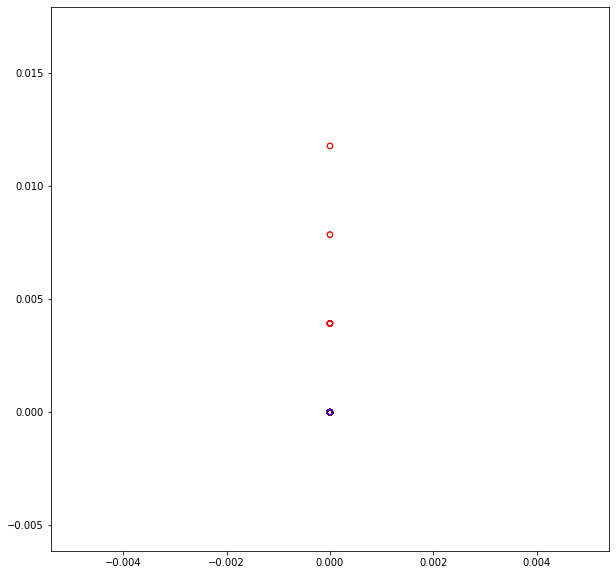

In [14]:
X, y = generate_data(DATASET_LINEARLY_SEPARABLE)

In [16]:
def gram_matrix(X, Y, kernel_type, gamma=0.5):
    K = np.zeros((X.shape[0], Y.shape[0]))
    
    if kernel_type == KERNEL_LINEAR:
        for i, x in enumerate(X):
            for j, y in enumerate(Y):
                K[i, j] = np.dot(x.T, y)
                
    elif kernel_type == KERNEL_RBF:
        for i, x in enumerate(X):
            for j, y in enumerate(Y):
                K[i, j] = np.exp(-gamma * np.linalg.norm(x - y) ** 2)
        
    return K

In [38]:
def train_svm(kernel):
    C = 1
    n, k = X.shape
    
    y_matrix = y.reshape(1, -1)
    H = np.dot(y_matrix.T, y_matrix) * gram_matrix(X, X, kernel)
    P = matrix(H)
    q = matrix(-np.ones((n, 1)))
    G = matrix(np.vstack((-np.eye((n)), np.eye(n))))
    h = matrix(np.vstack((np.zeros((n,1)), np.ones((n,1)) * C)))
    A = matrix(y_matrix)
    b = matrix(np.zeros(1))
    
    solvers.options['abstol'] = 1e-10
    solvers.options['reltol'] = 1e-10
    solvers.options['feastol'] = 1e-10
    solvers.options['show_progress'] = False

    return solvers.qp(P, q, G, h, A, b)

# Linear Kernel

In [19]:
X = parameters['X']
svm_parameters = train_svm(KERNEL_LINEAR)
print(svm_parameters)

     pcost       dcost       gap    pres   dres
 0: -2.2980e+02 -7.9682e+03  4e+04  2e+00  3e-12
 1: -1.3994e+02 -4.1704e+03  8e+03  4e-01  3e-12
 2: -6.5693e+01 -1.3165e+03  2e+03  9e-02  1e-12
 3: -3.3297e+01 -5.2933e+02  9e+02  4e-02  9e-13
 4: -1.4163e+01 -2.4795e+02  4e+02  1e-02  5e-13
 5: -9.8640e+00 -8.0942e+01  1e+02  3e-03  3e-13
 6: -9.4288e+00 -3.6231e+01  4e+01  1e-03  3e-13
 7: -9.9716e+00 -1.9064e+01  1e+01  1e-04  3e-13
 8: -1.1188e+01 -1.4373e+01  3e+00  4e-16  3e-13
 9: -1.1964e+01 -1.3020e+01  1e+00  2e-15  3e-13
10: -1.2225e+01 -1.2582e+01  4e-01  1e-15  3e-13
11: -1.2379e+01 -1.2392e+01  1e-02  1e-15  4e-13
12: -1.2385e+01 -1.2385e+01  3e-04  1e-15  4e-13
13: -1.2385e+01 -1.2385e+01  5e-06  3e-15  4e-13
14: -1.2385e+01 -1.2385e+01  9e-08  2e-15  4e-13
15: -1.2385e+01 -1.2385e+01  2e-09  1e-15  4e-13
16: -1.2385e+01 -1.2385e+01  2e-11  4e-15  6e-13
Optimal solution found.
{'x': <4500x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <9000x1 matrix, tc='d'>, 'z': <9

In [46]:
def get_parameters(alphas):
    threshold = 1e-5 # Values greater than zero (some floating point tolerance)
    S = (alphas > threshold).reshape(-1, )
    w = np.dot(X.T, alphas * y)
    b = y[S] - np.dot(X[S], w) # b calculation
    b = np.mean(b)
    return w, b, S

alphas = np.array(svm_parameters['x'])[:, 0]
w, b, S = get_parameters(alphas)

In [36]:
print('Number of Support Vectors: %s'% alphas[S].shape[0])
print('Alphas:', alphas[S])
print('w and b', w, b)

Number of Support Vectors: 163
Alphas: [1.14818365e-01 9.93488938e-02 4.34820193e-01 6.21020083e-02
 9.02974015e-02 4.24996622e-02 5.77601163e-02 2.53150691e-01
 1.90662638e-01 3.58263150e-02 1.35583761e-01 6.00556581e-01
 2.01037898e-02 1.91751025e-01 7.88045911e-02 1.14672346e-02
 1.91265330e-01 2.96274125e-01 2.62757524e-01 2.85304565e-02
 6.90085108e-02 1.76912716e-01 7.27635132e-02 2.20266584e-01
 2.25686757e-01 7.31891836e-02 6.45584054e-02 3.47856012e-01
 3.34827157e-02 2.21453441e-01 5.12177324e-02 1.72907245e-01
 5.64361362e-02 2.04685473e-01 3.12944439e-02 6.54081691e-02
 3.53333074e-01 2.72626052e-02 1.81656162e-01 1.25126548e-01
 8.50167977e-02 2.77888207e-02 7.24503141e-02 1.61582966e-01
 1.36061089e-01 8.90513952e-02 4.62653354e-02 1.06625611e-01
 2.72227360e-02 1.55933524e-01 1.25774552e-01 1.61834300e-01
 1.72305800e-01 2.74879608e-02 2.33109191e-01 3.24165981e-02
 2.28893217e-01 6.51245194e-02 2.82064126e-01 2.69427589e-02
 6.48365078e-02 2.63723708e-02 2.19773658e-01 

In [22]:
# TESTING DATA LOADING....

f = open(dest_folder+test_filename)
# i=0
# for x in f:
#     lst = x.split(',')
# #     print(int(lst[len(lst)-1][0])==5)
#     if(int(lst[len(lst)-1][0])!=1 and int(lst[len(lst)-1][0])!=2):
#         continue
#     i += 1
# print(i)

X2 = np.zeros(shape = (1000, image_size*image_size))
Y2 = np.zeros(shape = (1000, 1))

it = 0
for x in f:
    lst = x.split(',')
    if(int(lst[len(lst)-1][0])!=1 and int(lst[len(lst)-1][0])!=2):
        continue
    Y2[it] = np.asarray([lst[label]], dtype = np.float32)
    X2[it] = np.asarray(lst, dtype=np.float32)[:image_size*image_size]
    it += 1

for j in range(1000):
    for k in range(image_size*image_size):
        X2[j][k] /= 255
    if(Y2[j][0]==2):
        Y2[j][0] = -1
y2 = Y2.reshape(1,1000)[0]
print('TESTING X SHAPE: ',X2.shape)
print('TESTING Y SHAPE: ',y2.shape)

TESTING X SHAPE:  (1000, 784)
TESTING Y SHAPE:  (1000,)


In [26]:
# VALIDATION DATA LOADING....

f = open(dest_folder+val_filename)
# i=0
# for x in f:
#     lst = x.split(',')
# #     print(int(lst[len(lst)-1][0])==5)
#     if(int(lst[len(lst)-1][0])!=1 and int(lst[len(lst)-1][0])!=2):
#         continue
#     i += 1
# print(i)

X3 = np.zeros(shape = (500, image_size*image_size))
Y3 = np.zeros(shape = (500, 1))

it = 0
for x in f:
    lst = x.split(',')
    if(int(lst[len(lst)-1][0])!=1 and int(lst[len(lst)-1][0])!=2):
        continue
    Y3[it] = np.asarray([lst[label]], dtype = np.float32)
    X3[it] = np.asarray(lst, dtype=np.float32)[:image_size*image_size]
    it += 1

for j in range(500):
    for k in range(image_size*image_size):
        X3[j][k] /= 255
    if(Y3[j][0]==2):
        Y3[j][0] = -1
y3 = Y3.reshape(1,500)[0]
print('VAL X SHAPE: ',X3.shape)
print('VAL Y SHAPE: ',y3.shape)

VAL X SHAPE:  (500, 784)
VAL Y SHAPE:  (500,)


In [32]:
p_count = 0
for i in range(len(y3)):
    if((np.dot(w.T, X3[i]) + b > 0 and y3[i]==1) or (np.dot(w.T, X3[i]) + b < 0 and y3[i]==-1)):
        p_count += 1

print('Validation accuracy: ', p_count/len(y3))

p_count = 0
for i in range(len(y2)):
    if((np.dot(w.T, X2[i]) + b > 0 and y2[i]==1) or (np.dot(w.T, X2[i]) + b < 0 and y2[i]==-1)):
        p_count += 1

print('Test accuracy: ', p_count/len(y2))

Validation accuracy:  0.984
Test accuracy:  0.984


Linear kernel
Validation accuracy:  0.984
Test accuracy:  0.984

# PART B: Gaussian Kernel

In [49]:
svm_parameters = train_svm(KERNEL_RBF)
print(svm_parameters)

alphas = np.array(svm_parameters['x'])[:, 0]
w, b, S = get_parameters(alphas)

print('Number of Support Vectors: %s'% alphas[S].shape[0])
# print('Alphas:', alphas[S][:20])
print('w and b', w, b)

{'x': <4500x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <9000x1 matrix, tc='d'>, 'z': <9000x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 4.6261349321734025e-08, 'relative gap': 2.5041867502835563e-11, 'primal objective': -1847.3601985353416, 'dual objective': -1847.360198581603, 'primal infeasibility': 5.1514348342607263e-14, 'dual infeasibility': 8.269184136819442e-16, 'primal slack': 2.315989319398734e-13, 'dual slack': 1.5549491107127345e-13, 'iterations': 9}
Number of Support Vectors: 4441
w and b [ 0.00000000e+00 -5.37988791e-02 -3.94714205e-01 -5.23131054e-01
 -4.31764469e-01 -1.38443205e-01 -2.04211714e+00 -7.32233103e+00
 -9.55210626e+00  6.33255386e+01  3.19732578e+02  3.21873599e+02
  2.97354385e+02  3.30387280e+02  2.97159842e+02  2.86834329e+02
  1.96648848e+02  2.82269958e+02  3.79344820e+02  8.54390300e+01
  3.89892537e+00  2.36449258e+00 -1.01515012e-01 -1.03888797e+00
 -4.84299666e-01 -1.50687641e-01 -4.48993842e-02  0.00000000e+00
 -6.41449573e-02 -2.98268199e

In [50]:
p_count = 0
for i in range(len(y3)):
    if((np.dot(w.T, X3[i]) + b > 0 and y3[i]==1) or (np.dot(w.T, X3[i]) + b < 0 and y3[i]==-1)):
        p_count += 1

print('Validation accuracy: ', p_count/len(y3))

p_count = 0
for i in range(len(y2)):
    if((np.dot(w.T, X2[i]) + b > 0 and y2[i]==1) or (np.dot(w.T, X2[i]) + b < 0 and y2[i]==-1)):
        p_count += 1

print('Test accuracy: ', p_count/len(y2))

Validation accuracy:  0.952
Test accuracy:  0.942


GAUSSIAN KERNEL
Validation accuracy:  0.952
Test accuracy:  0.942

# PART C: SVM Package

In [40]:
# ==============================PART C (SKLEARN)==========================
from sklearn.svm import SVC
clf = SVC(C = 10, kernel = 'rbf')
a = clf.fit(X1, y1.ravel()) 

# print('w = ',clf.coef_)
# print('b = ',clf.intercept_)
# print('Indices of support vectors = ', clf.support_)
# print('Support vectors = ', clf.support_vectors_)
# print('Number of support vectors for each class = ', clf.n_support_)
# print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

print('Test Accuracy: ',a.score(X2, y2))
print('Val accuracy: ',a.score(X3, y3))

Test Accuracy:  0.993
Val accuracy:  0.994
